In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


Loading the dataset

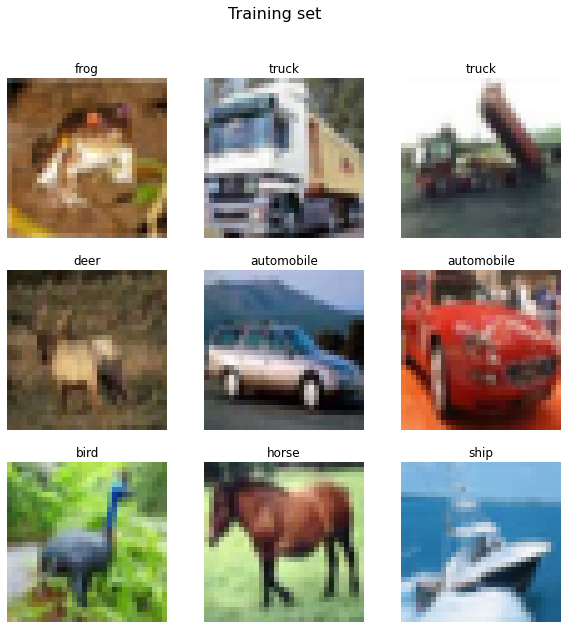

In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10, 10))
plt.suptitle('Training set', fontsize=16)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()



Dataset Analysis

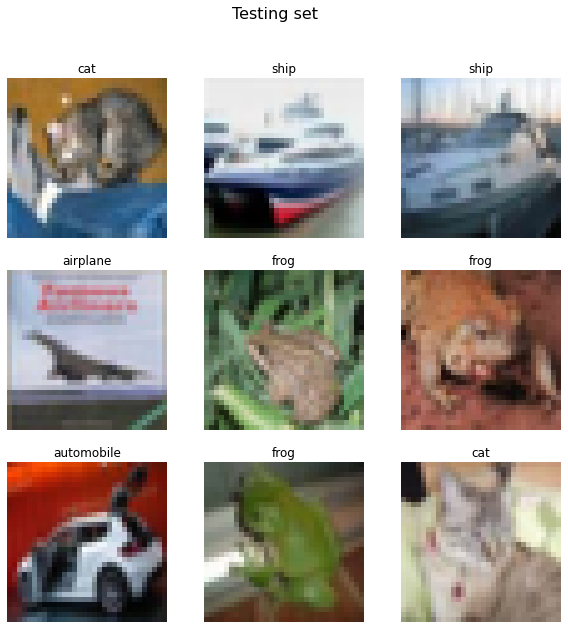

In [4]:
plt.figure(figsize=(10, 10))
plt.suptitle('Testing set', fontsize=16)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i])
    plt.title(class_names[y_test[i][0]])
    plt.axis('off')
plt.show()

Dataset plots

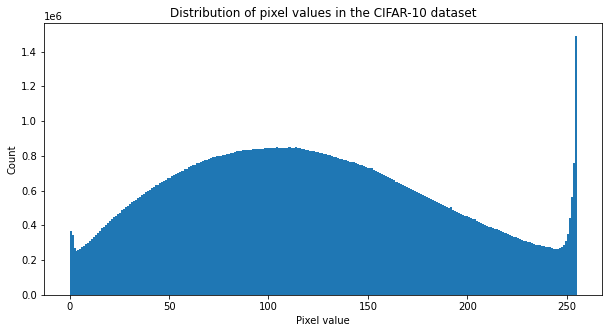

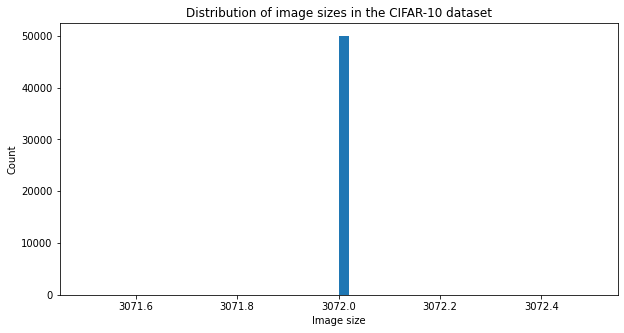

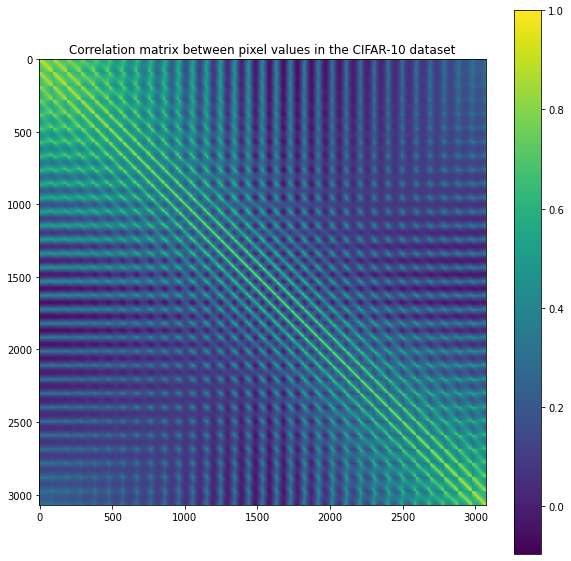

In [4]:

plt.figure(figsize=(10, 5))
plt.hist(x_train.ravel(), bins=256)
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.title('Distribution of pixel values in the CIFAR-10 dataset')
plt.show()

sizes = [x_train[i].size for i in range(len(x_train))]
plt.figure(figsize=(10, 5))
plt.hist(sizes, bins=50)
plt.xlabel('Image size')
plt.ylabel('Count')
plt.title('Distribution of image sizes in the CIFAR-10 dataset')
plt.show()

corr = np.corrcoef(x_train.reshape(x_train.shape[0], -1).T)
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='viridis')
plt.colorbar()
plt.title('Correlation matrix between pixel values in the CIFAR-10 dataset')
plt.show()


Train/test split

In [5]:
# Randomize the order of the images in the training set
train_indices = np.arange(x_train.shape[0])
np.random.shuffle(train_indices)
x_train = x_train[train_indices]
y_train = y_train[train_indices]


# Split the training set into training and validation sets
val_split = 0.1
num_val_samples = int(val_split * len(x_train))
x_val = x_train[:num_val_samples]
y_val = y_train[:num_val_samples]
x_train = x_train[num_val_samples:]
y_train = y_train[num_val_samples:]


print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_val shape:', x_val.shape)
print('y_val shape:', y_val.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (45000, 32, 32, 3)
y_train shape: (45000, 1)
x_val shape: (5000, 32, 32, 3)
y_val shape: (5000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


Preprocess the images

In [6]:
num_classes = 10
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

Count of classes in all datasets

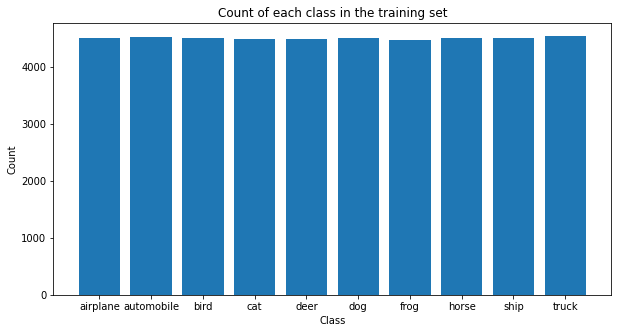

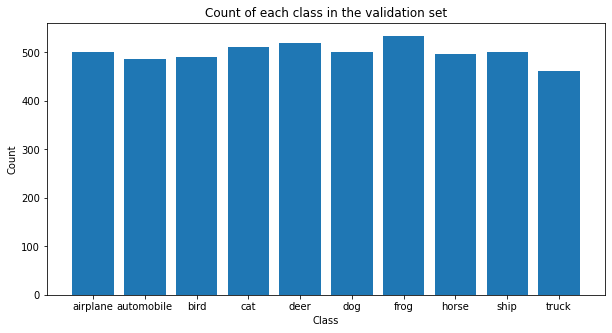

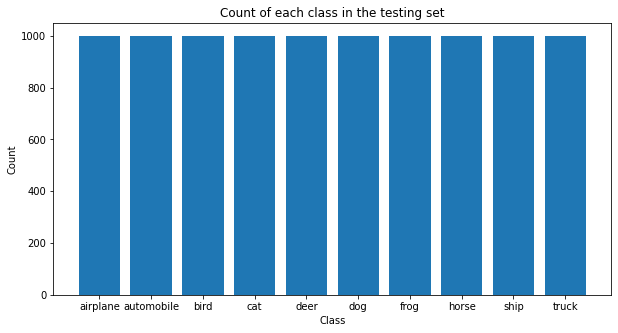

In [7]:
train_counts = np.zeros(10)
for label in y_train:
    train_counts[np.argmax(label)] += 1

val_counts = np.zeros(10)
for label in y_val:
    val_counts[np.argmax(label)] += 1

test_counts = np.zeros(10)
for label in y_test:
    test_counts[np.argmax(label)] += 1

plt.figure(figsize=(10, 5))
plt.bar(np.arange(10), train_counts)
plt.xticks(np.arange(10), class_names)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of each class in the training set')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(np.arange(10), val_counts)
plt.xticks(np.arange(10), class_names)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of each class in the validation set')
plt.show()


plt.figure(figsize=(10, 5))
plt.bar(np.arange(10), test_counts)
plt.xticks(np.arange(10), class_names)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of each class in the testing set')
plt.show()



In [8]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TensorFlow")

Default GPU Device: /device:GPU:0


Building model - CNN with 4 colvolutional layers

Epoch 1/50
704/704 [==============================] - 6s 9ms/step - loss: 1.5825 - accuracy: 0.4229 - val_loss: 1.2300 - val_accuracy: 0.5554
Epoch 2/50
704/704 [==============================] - 6s 9ms/step - loss: 1.1700 - accuracy: 0.5820 - val_loss: 1.0423 - val_accuracy: 0.6272
Epoch 3/50
704/704 [==============================] - 6s 9ms/step - loss: 0.9938 - accuracy: 0.6478 - val_loss: 0.8747 - val_accuracy: 0.6934
Epoch 4/50
704/704 [==============================] - 6s 8ms/step - loss: 0.8847 - accuracy: 0.6879 - val_loss: 0.8907 - val_accuracy: 0.6856
Epoch 5/50
704/704 [==============================] - 6s 8ms/step - loss: 0.8036 - accuracy: 0.7163 - val_loss: 0.7461 - val_accuracy: 0.7416
Epoch 6/50
704/704 [==============================] - 6s 8ms/step - loss: 0.7457 - accuracy: 0.7358 - val_loss: 0.7524 - val_accuracy: 0.7357
Epoch 7/50
704/704 [==============================] - 6s 8ms/step - loss: 0.6960 - accuracy: 0.7553 - val_loss: 0.7165 - val_accuracy: 0.7516
Epoch 

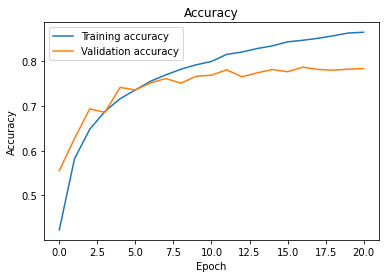

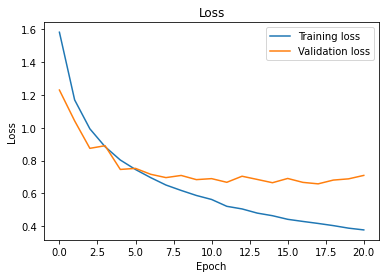

In [20]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=3)


history = model.fit(x_train, y_train, batch_size=64, epochs=50,validation_data=(x_test, y_test), callbacks=[early_stop])


test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

# Plot
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Accuracy results for model

In [21]:

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)


print(f'Train loss: {train_loss:.4f}, Train accuracy: {train_acc:.4f}')
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')


Train loss: 0.1215, Train accuracy: 0.9687
Test loss: 0.7097, Test accuracy: 0.7835


Tuning model with  5 convolutional layers


Epoch 1/50
704/704 [==============================] - 7s 10ms/step - loss: 1.7543 - accuracy: 0.3360 - val_loss: 1.4757 - val_accuracy: 0.4641
Epoch 2/50
704/704 [==============================] - 6s 9ms/step - loss: 1.3798 - accuracy: 0.4973 - val_loss: 1.2618 - val_accuracy: 0.5382
Epoch 3/50
704/704 [==============================] - 6s 9ms/step - loss: 1.2235 - accuracy: 0.5588 - val_loss: 1.0851 - val_accuracy: 0.6186
Epoch 4/50
704/704 [==============================] - 7s 9ms/step - loss: 1.1198 - accuracy: 0.6004 - val_loss: 1.0309 - val_accuracy: 0.6356
Epoch 5/50
704/704 [==============================] - 7s 9ms/step - loss: 1.0444 - accuracy: 0.6307 - val_loss: 0.9053 - val_accuracy: 0.6778
Epoch 6/50
704/704 [==============================] - 7s 9ms/step - loss: 0.9887 - accuracy: 0.6512 - val_loss: 0.8891 - val_accuracy: 0.6896
Epoch 7/50
704/704 [==============================] - 7s 9ms/step - loss: 0.9486 - accuracy: 0.6652 - val_loss: 0.8726 - val_accuracy: 0.6964
Epoch

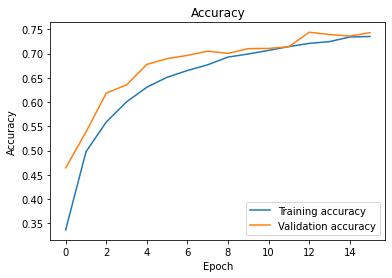

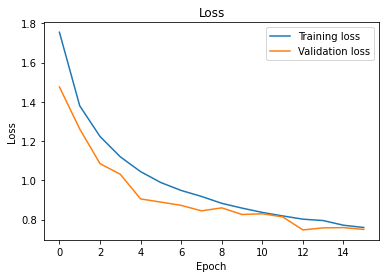

In [22]:
model_new = Sequential()
model_new.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model_new.add(MaxPooling2D(pool_size=(2, 2)))
model_new.add(Dropout(0.25))

model_new.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_new.add(MaxPooling2D(pool_size=(2, 2)))
model_new.add(Dropout(0.25))

model_new.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_new.add(MaxPooling2D(pool_size=(2, 2)))
model_new.add(Dropout(0.25))

model_new.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_new.add(MaxPooling2D(pool_size=(2, 2)))
model_new.add(Dropout(0.25))

model_new.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_new.add(MaxPooling2D(pool_size=(2, 2)))
model_new.add(Dropout(0.25))

model_new.add(Flatten())
model_new.add(Dense(512, activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(num_classes, activation='softmax'))


early_stop = EarlyStopping(monitor='val_loss', patience=3)

model_new.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history_new = model_new.fit(x_train, y_train, batch_size=64, epochs=50,validation_data=(x_test, y_test), callbacks=[early_stop])

# Plot 
plt.plot(history_new.history['accuracy'], label='Training accuracy')
plt.plot(history_new.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_new.history['loss'], label='Training loss')
plt.plot(history_new.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Accuracy of model_new

In [23]:

train_loss, train_acc = model_new.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model_new.evaluate(x_test, y_test, verbose=0)

print(f'Train loss: {train_loss:.4f}, Train accuracy: {train_acc:.4f}')
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

Train loss: 0.5419, Train accuracy: 0.8075
Test loss: 0.7501, Test accuracy: 0.7433


Model with 6 convolutional layers

Epoch 1/50
704/704 [==============================] - 7s 11ms/step - loss: 1.7129 - accuracy: 0.3613 - val_loss: 1.3247 - val_accuracy: 0.5164
Epoch 2/50
704/704 [==============================] - 7s 10ms/step - loss: 1.2098 - accuracy: 0.5619 - val_loss: 1.0104 - val_accuracy: 0.6427
Epoch 3/50
704/704 [==============================] - 7s 10ms/step - loss: 1.0322 - accuracy: 0.6313 - val_loss: 0.9118 - val_accuracy: 0.6773
Epoch 4/50
704/704 [==============================] - 7s 10ms/step - loss: 0.9121 - accuracy: 0.6779 - val_loss: 0.7941 - val_accuracy: 0.7199
Epoch 5/50
704/704 [==============================] - 7s 10ms/step - loss: 0.8333 - accuracy: 0.7087 - val_loss: 0.7655 - val_accuracy: 0.7315
Epoch 6/50
704/704 [==============================] - 7s 10ms/step - loss: 0.7746 - accuracy: 0.7283 - val_loss: 0.7599 - val_accuracy: 0.7370
Epoch 7/50
704/704 [==============================] - 7s 10ms/step - loss: 0.7255 - accuracy: 0.7469 - val_loss: 0.6932 - val_accuracy: 0.7624

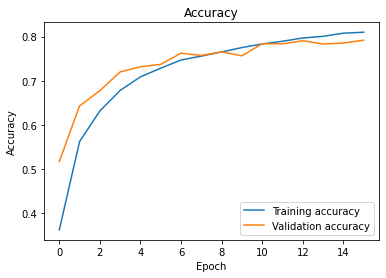

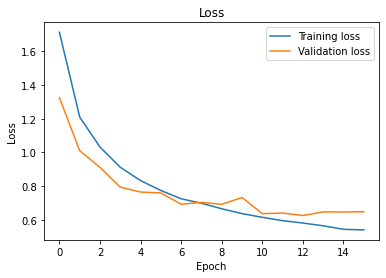

In [24]:
model_3_0 = Sequential()


model_3_0.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model_3_0.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_3_0.add(MaxPooling2D(pool_size=(2, 2)))
model_3_0.add(Dropout(0.25))

model_3_0.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_3_0.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_3_0.add(MaxPooling2D(pool_size=(2, 2)))
model_3_0.add(Dropout(0.25))

model_3_0.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_3_0.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_3_0.add(MaxPooling2D(pool_size=(2, 2)))
model_3_0.add(Dropout(0.25))


model_3_0.add(Flatten())
model_3_0.add(Dense(512, activation='relu'))
model_3_0.add(Dropout(0.5))
model_3_0.add(Dense(num_classes, activation='softmax'))

model_3_0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=3)

history_3_0 = model_3_0.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stop])

plt.plot(history_3_0.history['accuracy'], label='Training accuracy')
plt.plot(history_3_0.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_3_0.history['loss'], label='Training loss')
plt.plot(history_3_0.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Accuracy with model_3

In [25]:
train_loss, train_acc = model_3_0.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model_3_0.evaluate(x_test, y_test, verbose=0)


print(f'Train loss: {train_loss:.4f}, Train accuracy: {train_acc:.4f}')
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')


Train loss: 0.3249, Train accuracy: 0.8865
Test loss: 0.6484, Test accuracy: 0.7918


6 convolutional layer model with SGD optimizer

Epoch 1/50
1407/1407 [==============================] - 11s 8ms/step - loss: 2.0042 - accuracy: 0.2486 - val_loss: 1.6857 - val_accuracy: 0.4006
Epoch 2/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5048 - accuracy: 0.4469 - val_loss: 1.3250 - val_accuracy: 0.5257
Epoch 3/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2610 - accuracy: 0.5454 - val_loss: 1.0844 - val_accuracy: 0.6139
Epoch 4/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.1067 - accuracy: 0.6052 - val_loss: 0.9693 - val_accuracy: 0.6540
Epoch 5/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.9926 - accuracy: 0.6487 - val_loss: 0.9050 - val_accuracy: 0.6888
Epoch 6/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.9201 - accuracy: 0.6730 - val_loss: 0.8216 - val_accuracy: 0.7158
Epoch 7/50
1407/1407 [==============================] - 11s 7ms/step - loss: 0.8677 - accuracy: 0.6961 - val_loss: 0.7699 - val_ac

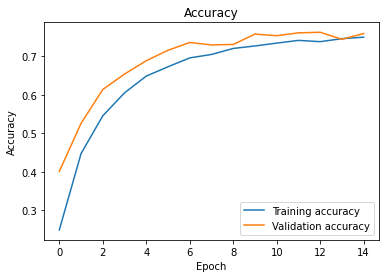

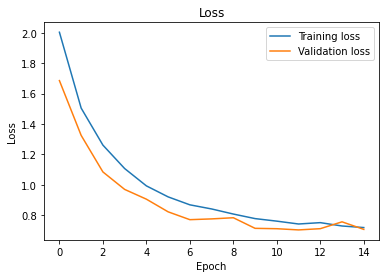

In [26]:
from keras.optimizers import SGD

model_4 = Sequential()
model_4.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model_4.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_4.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_4.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())
model_4.add(Dense(512, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes, activation='softmax'))


sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_4.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


history_4 = model_4.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stop])


test_loss, test_acc = model_4.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

import matplotlib.pyplot as plt

# Plot 
plt.plot(history_4.history['accuracy'], label='Training accuracy')
plt.plot(history_4.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_4.history['loss'], label='Training loss')
plt.plot(history_4.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Accuracy with SGD 

In [27]:
train_loss, train_acc = model_4.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model_4.evaluate(x_test, y_test, verbose=0)

print(f'Train loss: {train_loss:.4f}, Train accuracy: {train_acc:.4f}')
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

Train loss: 0.5286, Train accuracy: 0.8190
Test loss: 0.7060, Test accuracy: 0.7594


Model with HyperParameter Tuning

Epoch 1/10
938/938 [==============================] - 7s 8ms/step - loss: 1.5490 - accuracy: 0.4352 - val_loss: 1.2513 - val_accuracy: 0.5460
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 1.1032 - accuracy: 0.6089 - val_loss: 0.9631 - val_accuracy: 0.6632
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.9111 - accuracy: 0.6789 - val_loss: 0.9053 - val_accuracy: 0.6813
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.7733 - accuracy: 0.7276 - val_loss: 0.8500 - val_accuracy: 0.7046
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.6684 - accuracy: 0.7633 - val_loss: 0.8213 - val_accuracy: 0.7225
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.5752 - accuracy: 0.7960 - val_loss: 0.8078 - val_accuracy: 0.7339
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.4942 - accuracy: 0.8268 - val_loss: 0.8561 - val_accuracy: 0.7295
Epoch 

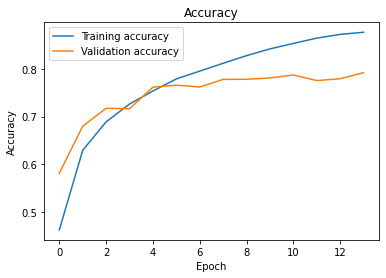

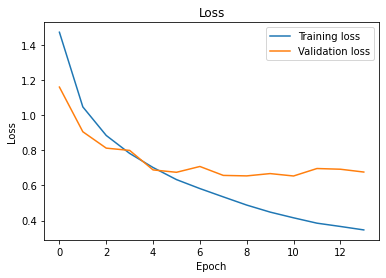

In [15]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt



def build_model(dropout_rate=0.25, optimizer='adam'):
    model_new = Sequential()
    model_new.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
    model_new.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model_new.add(MaxPooling2D(pool_size=(2, 2)))
    model_new.add(Dropout(dropout_rate))

    model_new.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model_new.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model_new.add(MaxPooling2D(pool_size=(2, 2)))
    model_new.add(Dropout(dropout_rate))

    model_new.add(Flatten())
    model_new.add(Dense(512, activation='relu'))
    model_new.add(Dropout(dropout_rate))
    model_new.add(Dense(num_classes, activation='softmax'))

  
    model_new.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model_new

early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Define parameters 
param_grid = {'batch_size': [32, 64],
              'epochs': [10, 20],
              'dropout_rate': [0.2, 0.3],
              'optimizer': ['adam', 'rmsprop']}

# Create Keras model wrapper
model_tuned = KerasClassifier(build_fn=build_model, verbose=1)



# Perform grid search
grid = GridSearchCV(estimator=model_tuned, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[early_stop])

# Print 
print(f'Best score: {grid_result.best_score_:.4f}, using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print(f'{mean:.4f} ({std:.4f}) with: {param}')


best_model_1 = build_model(dropout_rate=grid_result.best_params_['dropout_rate'], optimizer=grid_result.best_params_['optimizer'])
history_tuned = best_model_1.fit(x_train, y_train, batch_size=grid_result.best_params_['batch_size'], epochs=grid_result.best_params_['epochs'], validation_data=(x_test, y_test),callbacks=[early_stop])

# Plot 
plt.plot(history_tuned.history['accuracy'], label='Training accuracy')
plt.plot(history_tuned.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_tuned.history['loss'], label='Training loss')
plt.plot(history_tuned.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Accuracy with hyperparameter tuning

In [16]:
train_loss, train_acc = best_model_1.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = best_model_1.evaluate(x_test, y_test, verbose=0)


print(f'Train loss: {train_loss:.4f}, Train accuracy: {train_acc:.4f}')
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')


Train loss: 0.1132, Train accuracy: 0.9716
Test loss: 0.6760, Test accuracy: 0.7922


In [19]:
# import numpy as np
# from tensorflow.keras.datasets import cifar10
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# import matplotlib.pyplot as plt

# # Define the model architecture
# def build_model(num_filters1=32, num_filters2=64, kernel_size1=3, kernel_size2=3,
#                 pool_size1=2, pool_size2=2, dropout_rate=0.25, optimizer='adam'):
#     model_new = Sequential()
#     model_new.add(Conv2D(num_filters1, (kernel_size1, kernel_size1), activation='relu', padding='same', input_shape=x_train.shape[1:]))
#     model_new.add(Conv2D(num_filters1, (kernel_size1, kernel_size1), activation='relu', padding='same'))
#     model_new.add(MaxPooling2D(pool_size=(pool_size1, pool_size1)))
#     model_new.add(Dropout(dropout_rate))

#     model_new.add(Conv2D(num_filters2, (kernel_size2, kernel_size2), activation='relu', padding='same'))
#     model_new.add(Conv2D(num_filters2, (kernel_size2, kernel_size2), activation='relu', padding='same'))
#     model_new.add(MaxPooling2D(pool_size=(pool_size2, pool_size2)))
#     model_new.add(Dropout(dropout_rate))

#     model_new.add(Flatten())
#     model_new.add(Dense(512, activation='relu'))
#     model_new.add(Dropout(dropout_rate))
#     model_new.add(Dense(num_classes, activation='softmax'))

#     # Compile the model
#     model_new.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
#     return model_new

# # Define early stopping callback
# early_stop = EarlyStopping(monitor='val_loss', patience=3)

# # Define parameters to tune
# param_grid = {'num_filters1': [16, 32],
#               'num_filters2': [32, 64],
#               'kernel_size1': [3, 5],
#               'kernel_size2': [3, 5],
#               'pool_size1': [2, 3],
#               'pool_size2': [2, 3],
#               'dropout_rate': [0.2, 0.3],
#               'optimizer': ['adam']}

# # Create Keras model wrapper
# model_tuned = KerasClassifier(build_fn=build_model, epochs=10, batch_size=32, verbose=1)

# # Perform grid search with cross-validation
# grid = GridSearchCV(estimator=model_tuned, param_grid=param_grid, cv=3)
# grid_result = grid.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[early_stop])

# # Print results
# print(f'Best score: {grid_result.best_score_:.4f}, using {grid_result.best_params_}')
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, std, param in zip(means, stds, params):
#     print(f'{mean:.4f} ({std:.4f}) with: {param}')


# # Train the model on the full training set with the best hyperparameters
# best_model_new = build_model(conv_layers=grid_result.best_params_['conv_layers'],
# subsample_layers=grid_result.best_params_['subsample_layers'],
# dropout_rate=grid_result.best_params_['dropout_rate'],
# optimizer=grid_result.best_params_['optimizer'])

# history_new = best_model_new.fit(x_train, y_train,batch_size=grid_result.best_params_['batch_size'],epochs=grid_result.best_params_['epochs'],validation_data=(x_test, y_test),callbacks=[early_stop])

# # Plot the accuracy and loss curves for the training and validation sets
# plt.plot(history_new.history['accuracy'], label='Training accuracy')
# plt.plot(history_new.history['val_accuracy'], label='Validation accuracy')
# plt.title('Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# plt.plot(history_new.history['loss'], label='Training loss')
# plt.plot(history_new.history['val_loss'], label='Validation loss')
# plt.title('Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

Lable predictions with the best model

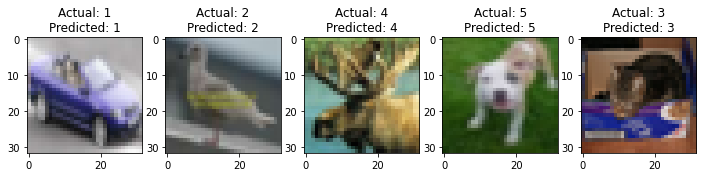

In [28]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 5
sample_indices = np.random.choice(np.arange(len(x_test)), size=num_samples, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

predicted_labels = best_model_1.predict(sample_images)

# Plot 
fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))
for i in range(num_samples):
    axes[i].imshow(sample_images[i])
    axes[i].set_title("Actual: {}\nPredicted: {}".format(np.argmax(sample_labels[i]), np.argmax(predicted_labels[i])))
plt.show()


Confusion Matrix with the best model

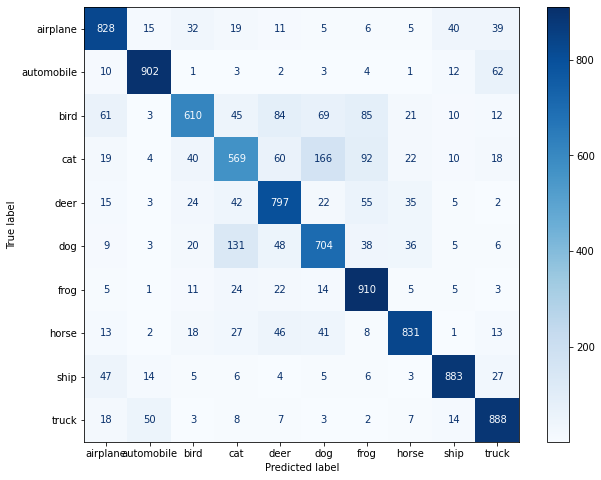

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_model_1.predict(x_test)

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()


ROC curve with the best model

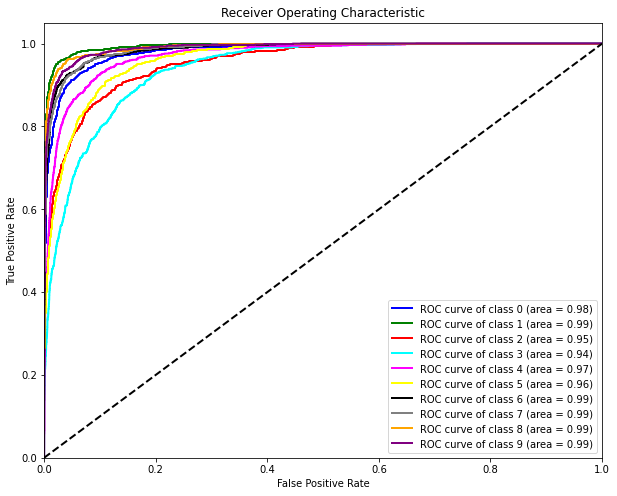

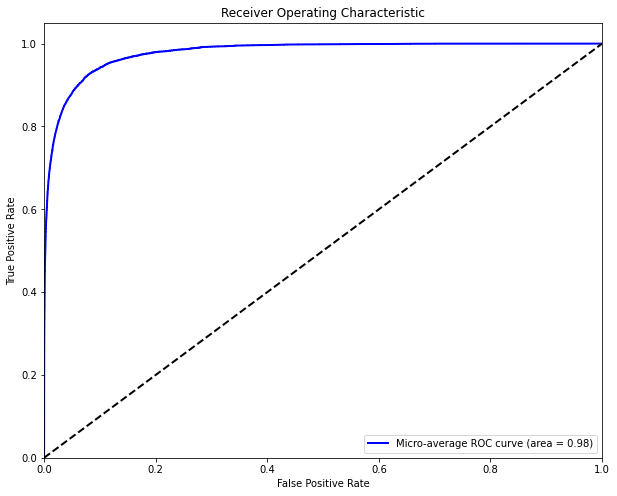

In [30]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc


fig, ax = plt.subplots(figsize=(10, 8))

y_test_bin = label_binarize(y_test, classes=np.arange(num_classes))


y_pred = best_model_1.predict(x_test)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'gray', 'orange', 'purple']
for i in range(num_classes):
    ax.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc='lower right')
plt.show()


fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(fpr_micro, tpr_micro, color='blue', lw=2, label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro))
ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc='lower right')
plt.show()

